EJERCICIO 1: IMPLEMENTACIÓN TRANSFORMADA DISCRETA DE FOURIER

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


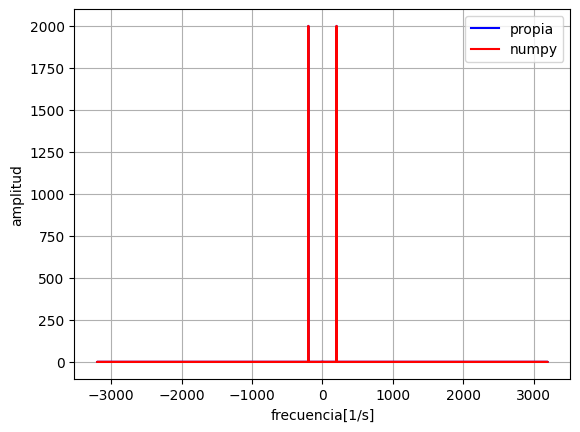

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# Construcción de la señal
N = 4000 # number of point in the whole interval
f = 200.0 #  frequency in Hz
dt = 1 / (f * 32 ) #32 samples per unit frequency
t = np.linspace( 0, (N-1)*dt, N)
y = np.cos(2 * np.pi * f * t) - 0.4 * np.sin(2 * np.pi * (2*f) * t )+ 0.17*np.sin(2 * np.pi * (15*f) * t )

# 1) implemente de la transformada de fourier discreta
def fourier (tt,yy):
  long=len(tt)
  x=np.zeros(long,dtype=complex)
  for k in range(len(tt)):
    E_1J=np.exp(-1j*2*np.pi*k*np.arange(long)/long)
    Aux=np.dot(yy,E_1J)
    x[k]=Aux
  return x

fft_x=fourier(t,y)
fft_x2=fft(y)
# # 2) Genere el arreglo de las frecuencias (ver documentación de fftfreq):
def frecuencias(nn,dd):
  if nn%2 == 0:
      w1=np.linspace(0,nn/2-1,int(nn/2))/(dd*nn)
      w2=-np.linspace(1,nn/2,int(nn/2))/(dd*nn)
  else:
      w1=np.linspace(0,(nn-1)/2,int(nn/2)+1)/(dd*nn)
      w2=-np.linspace((nn-1)/2,1,int(nn/2))/(dd*nn)
  return np.append(w1,w2[::-1])

w1 =frecuencias(N,dt)

w2=fftfreq(N,dt)
#frecuencias(N,1)
# 3) Haga una gráfica comparando método propio con implementación de scipy.fftpack.fft
plt.figure(1)
plt.plot(w1,np.real(fft_x),'b',markersize=1.1,label='propia')
plt.plot(w2,fft_x2,'r',markersize=1,label='numpy')
plt.legend()
plt.xlabel('frecuencia[1/s]')
plt.ylabel('amplitud')
plt.grid()

# fft_x = fft(y) / n # FFT Normalized
# freq = fftfreq(n, dt) # Recuperamos las frecuencias

EJERCICIO 2: FILTRO DE FOURIER

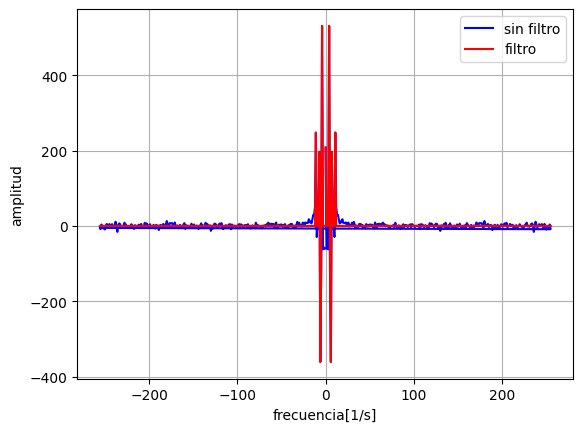

In [2]:

import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# 1) Almacene los datos de signal.dat. La columna 1 es el tiempo y la columna 2 es su señal f(t).
#Grafique su señal en función del tiempo.
nombre_archivo_1= 'signal.dat'
signal = np.genfromtxt(nombre_archivo_1, delimiter=',')


# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.
N_signal=len(signal[:,0])
dt_signal=signal[1,0]-signal[0,0]
w_signal=frecuencias(N_signal,1/N_signal)
fft_signal=fourier(signal[:,0],signal[:,1])

## FIGURA
plt.figure(2)
plt.plot(w_signal,np.real(fft_signal),'b',markersize=1,label='sin filtro')
##
# 3) Haga un filtro pasa bajos que le permita filtrar el ruido de la señal del punto 1. #
#Use la gráfica de la transformada de fourier del punto 3 para determinar un valor apropiado de la frecuencia de corte que debe usar para filtrar dicho ruido de alta frecuencia.
fft_signal[np.abs(fft_signal)<100]=0

# 4) Grafique la señal filtrada

plt.figure(2)
plt.plot(w_signal,np.real(fft_signal),'r',markersize=1,label='filtro')
plt.legend()
plt.xlabel('frecuencia[1/s]')
plt.ylabel('amplitud')
plt.grid()

EJERCICIO 3: FILTROS VIOLIN-TROMPETA (OPCIONAL)

In [3]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# 1) Almacene los datos de violin.wav (use wav.read('violin.wav')).
#Grafique su señal en función del tiempo y guarde dicha gráfica.

# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

# 3) Haga un filtro que elimine el pico principal. Grafique su señal filtrada.
#Escuche (OJO con el volumen!) sus datos filtrados.
#Repita lo anterior haciendo un filtro pasaaltos y uno pasabajos.

#NOTA: para el manejo de archivos .wav mire la documentacion de python de input-output en https://docs.scipy.org/doc/scipy-0.14.0/reference/io.html)

# 4) repita lo anterior para trumpet.wav que es la señal correspondiente al sonido de una trompeta tocando la misma nota que el violín del puntos anterior.


EJERCICIO 4: FILTRO RUIDO PERIÓDICO IMAGEN 2D

<ipython-input-4-e39ef0d90757>:34: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(FF2)),cmap="gray")


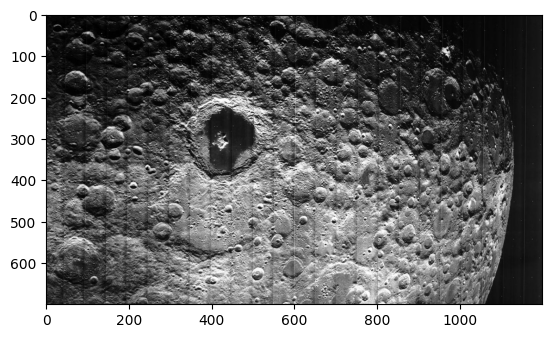

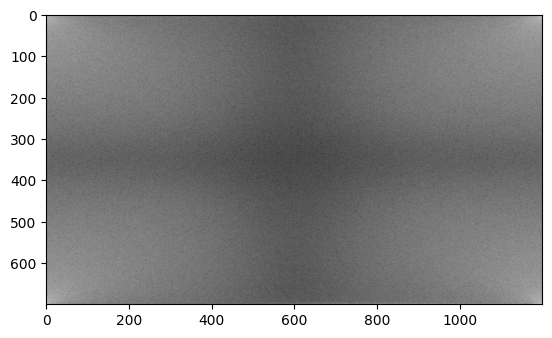

<Figure size 640x480 with 0 Axes>

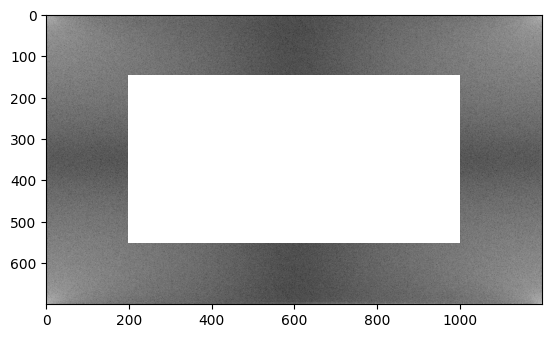

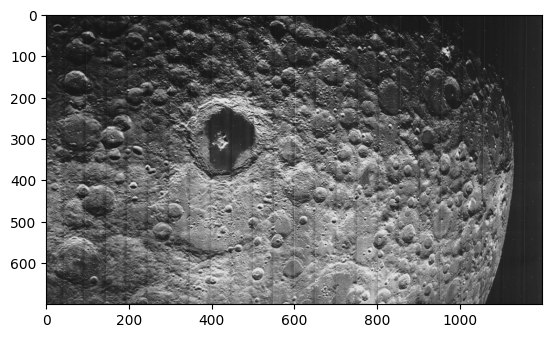

In [4]:

import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft,fft2, fftfreq,ifft2
name="moon.jpg"
IMG=plt.imread(name)

# 1) Almacene los datos de la imagen (use imread: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)

# 2) Use la librería de scipy de transformada de fourier en 2d y la trasnformada inversa
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html)
#para hacer un código que filtre el ruido periodico que tiene la imagen de la luna.

#2a) haga una imagen de la luna para revisar que los datos están bien almacenados
#2b) haga también una imágen de la transformada de foruirer de la imagen
#2c) haga una imagen que muestre las transformada de fourier después del filtro
plt.figure(21)
plt.imshow(IMG,cmap="gray")
FF2=fft2(IMG)
plt.figure(22)
plt.imshow(np.log(np.abs(FF2)),cmap="gray")
# plt.plot(np.real(FF2[:,600]))
# #filtro A
# t=1500000
# FF2[np.real(FF2)>t]=0
a=200
b=400
atenuacion1=0

plt.figure(23)
#filtro
FF2[350-a:350+a,600-b:600+b]=atenuacion1*FF2[350-a:350+a,600-b:600+b]

plt.figure(24)
plt.imshow(np.log(np.abs(FF2)),cmap="gray")
# print(IMG_FILT)
#NOTA: las gráficas que mostré en clase de la transformada de Fourier de la imagen de la luna
#las hice usando los siguientes parámetros en imshow():
#plt.imshow(np.real(Transformadadefourierdelaimagen), cmap=cm.gray, vmin =0, vmax=200.)

#3) haga una gráfica de la imagen filtrada y guárdela en LunaFiltrada.png
IMG_FILT=np.real(ifft2(FF2))
plt.figure(25)
plt.imshow(IMG_FILT,cmap="gray")
plt.savefig("LunaFiltrada.png")
#imagen: https://blogs.3ds.com/simulia/wp-content/uploads/sites/18/2019/07/NASA_Moon.jpg



EJERCICIO 5: FASE Y MAGNITUD

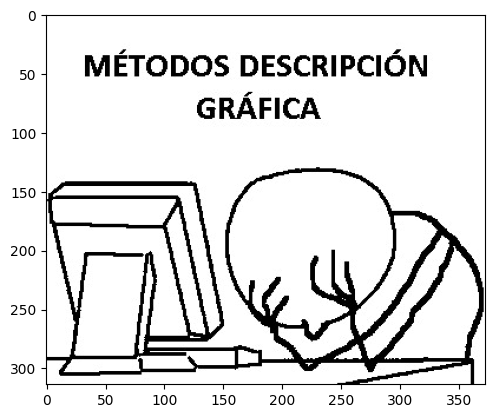

In [5]:
#Recupere la imagen original a partir de la fase y la amplitud de la transformada de fourier (archivos amplitude.dat y phase.dat).
#Recuerde que la transformada de fourier tiene una parte real y una imaginaria
#y recuerde tambien que un numero complejo se puede escribir a partir de la fase y la magnitud que son los datos que usted tiene
#(http://webpages.ursinus.edu/lriley/ref/complex/node1.html)


#1)Descargue los datos de fase y magnitud
name_Amp="magnitude.dat"
name_fase="phase.dat"
Amplitud=np.genfromtxt(name_Amp, delimiter=' ')

fase=np.genfromtxt(name_fase, delimiter=' ')

#2) construya la transformada de fourier
FFT_img=Amplitud*np.exp(1j*fase)
IMG_IFFT=np.real(ifft2(FFT_img))
#3) Obtenga la imagen haciendo la transformada inversa
plt.figure(26)
plt.imshow(IMG_IFFT,cmap="gray")